### Data processing for concating epitheial from this cohort and external cohorts

In [34]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'Arial'
datapath = '../data'

In [35]:
adata_epi_cnv = sc.read_h5ad(f'{datapath}/adata-epi-cnv.h5ad')
adata_epi_cnv

AnnData object with n_obs × n_vars = 53019 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'cnv_leiden', 'cnv_score', 'cnv_status', 'IHC', 'epi-leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'CellphoneDB', 'IHC_colors', 'batch_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_leiden', 'epi-leiden_colors', 'epi-subtype_colors', 'gender_colors', 'hvg', 'leiden', 'leiden-harmony-female_colors', 'leiden_colors'

In [ ]:
adata = sc.read_h5ad(f'{datapath}/adata-GSE161529.h5ad')
adata

AnnData object with n_obs × n_vars = 33698 × 23936
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-major', 'major-type'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dea_leiden-major', 'dendrogram_leiden-major', 'hvg', 'leiden-major', 'leiden-major_colors', 'log1p', 'major-type_colors', 'neighbors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
wdata = sc.read_h5ad(f"{datapath}/adata-GSE176078.h5ad")

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata_concat = adata_epi_cnv.concatenate([
  wdata[wdata.obs['annotation'].isin(['Cancer Basal', 'Cancer Epithelial', 'Normal Epithelial'])],
  adata[adata.obs['major-type'].isin(['Basal', 'Epithelium'])]
  ],
  batch_categories=['Young', 'Non-young','Young-inter'], batch_key='age')
adata_concat

/tmp/ipykernel_2878107/2537748471.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_epi_cnv.concatenate([
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 76702 × 17269
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'cnv_leiden', 'cnv_score', 'cnv_status', 'IHC', 'epi-leiden', 'type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major', 'leiden-1', 'UCell_B cells', 'UCell_B cells memory', 'UCell_B cells naive', 'UCell_Basophils', 'UCell_Dendritic cells', 'UCell_Eosinophils', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_Gamma delta T cells', 'UCell_Macrophages', 'UCell_Mast cells', 'UCell_Megakaryocytes', 'UCell_Monocytes', 'UCell_Myeloid-derived suppressor cells', 'UCell_

In [ ]:
adata_concat.obs = adata_concat.obs[['batch', 'age']]

In [ ]:
def clu(adata, key_added="majorType-fix", n_neighbors=50, n_pcs=30, rep='X_pca_harmony', do_har=False, max_iter=20, do_scrublet=False, har_key='batch', resolution=1):
    # Computing the neighborhood graph
    if do_scrublet:
        n0 = adata.shape[0]
        print("{0} Cell number: {1}".format(key_added, n0))
        sc.external.pp.scrublet(adata)
        adata = adata[adata.obs['predicted_doublet']==False,:].copy()
        print("{0} Cells retained after scrublet, {1} cells reomved.".format(adata.shape[0], n0-adata.shape[0]))
    else:
        print("Ignoring processing doublet cells...")
    if do_har and len(adata.obs[har_key].cat.categories) > 1:
        sc.external.pp.harmony_integrate(adata, key=har_key,max_iter_harmony=max_iter)
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    else:
        print("Evaluating neighbors only...")
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    # Run UMAP
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=resolution, key_added=key_added)
    sc.pl.umap(adata, color=key_added, legend_fontoutline=True, palette=sc.pl.palettes.default_20, legend_loc="on data")
    return adata

Ignoring processing doublet cells...
Evaluating neighbors only...


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


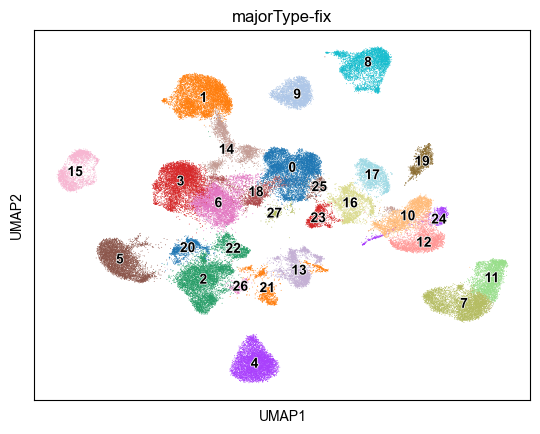

In [ ]:
adata_concat = clu(adata_concat, do_scrublet=False,  do_har=False, rep='X_pca', n_pcs=15)

In [ ]:
adata_concat = adata_concat.concatenate(
  wdata[wdata.obs['annotation'].isin(['CD4+ T cell', 'CD8+ T cell','Treg','Endothelial'])],
  batch_categories=['Query', 'Reference'], batch_key='CNV')
adata_concat

/tmp/ipykernel_42926/2701374220.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_concat.concatenate(
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/annda

AnnData object with n_obs × n_vars = 95537 × 17269
    obs: 'batch', 'age', 'majorType-fix', 'IHC', 'study', 'annotation', 'type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_B cells', 'UCell_B cells memory', 'UCell_B cells naive', 'UCell_Basophils', 'UCell_Dendritic cells', 'UCell_Eosinophils', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_Gamma delta T cells', 'UCell_Macrophages', 'UCell_Mast cells', 'UCell_Megakaryocytes', 'UCell_Monocytes', 'UCell_Myeloid-derived suppressor cells', 'UCell_NK cells', 'UCell_Natural killer T cells', 'UCell_Neutrophils', 'UCell_Nuocytes', 'UCell_Plasma cells', 'UCell_Plasmacytoid dendritic cells', 'UCell_Platelets', 'UCell_Red pulp macrophages', 'UCell_Reticulocytes', 'UCell_T cells', 'UCell_T cytotoxic cells', 'UCell_T follicular helper cells'

In [ ]:
sc.pp.normalize_total(adata_concat)
sc.pp.log1p(adata_concat)
sc.pp.highly_variable_genes(adata_concat,min_disp=0.5, n_top_genes=2000)

In [ ]:
import infercnvpy as cnv 
import pandas as pd
chrom = pd.read_csv("gene_pos.txt", sep='\t', header=None)
chrom.columns = ["symbol", "ensg", "chromosome", "start", "end"]
chrom.index = chrom['symbol']
chrom['ensg'] = [name.split('.')[0] for name in chrom['ensg']]
chrom_ensg = chrom.copy()
chrom_ensg.index = chrom_ensg['ensg']
var_names = list(adata_concat.var_names[adata_concat.var_names.isin(chrom['symbol']) + adata_concat.var_names.isin(chrom['ensg'])])
adata_epi_var = adata_concat[:, var_names]
adata_epi_var = adata_concat[:, var_names]
for i in range(len(var_names)):
    name = var_names[i]
    if name in chrom_ensg['ensg']:
        var_names[i] = chrom_ensg['symbol'][name]
adata_epi_var.var_names = var_names
chrom_var_names = chrom.loc[var_names, :]
adata_epi_cnv = adata_concat[:, adata_concat.var_names.isin(chrom['symbol']) + adata_concat.var_names.isin(chrom['ensg'])]
adata_epi_cnv.var_names = var_names
adata_epi_cnv.var = pd.concat([adata_epi_var.var, chrom_var_names], axis=1)
adata_epi_cnv.var_names_make_unique()
cnv.tl.infercnv(adata_epi_cnv,reference_key="annotation", reference_cat=['CD4+ T cell', 'CD8+ T cell','Treg','Endothelial'])

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
adata_epi_cnv = adata_epi_cnv[~adata_epi_cnv.obs['annotation'].isin(['CD4+ T cell', 'CD8+ T cell','Treg','Endothelial'])]

View of AnnData object with n_obs × n_vars = 76216 × 17269
    obs: 'batch', 'age', 'majorType-fix', 'IHC', 'study', 'annotation', 'type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_B cells', 'UCell_B cells memory', 'UCell_B cells naive', 'UCell_Basophils', 'UCell_Dendritic cells', 'UCell_Eosinophils', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_Gamma delta T cells', 'UCell_Macrophages', 'UCell_Mast cells', 'UCell_Megakaryocytes', 'UCell_Monocytes', 'UCell_Myeloid-derived suppressor cells', 'UCell_NK cells', 'UCell_Natural killer T cells', 'UCell_Neutrophils', 'UCell_Nuocytes', 'UCell_Plasma cells', 'UCell_Plasmacytoid dendritic cells', 'UCell_Platelets', 'UCell_Red pulp macrophages', 'UCell_Reticulocytes', 'UCell_T cells', 'UCell_T cytotoxic cells', 'UCell_T follicular helpe

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/rzh/BCY/lib/python3.10/site-packages/infercnvpy/tl/__init__.py:73: ImplicitModificationWarning: Setting element `.obsm['X_cnv_pca']` of view, initializing view as actual.
  adata.obsm[f"X_{key_added}"] = pca_res
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rzh/BCY/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names a

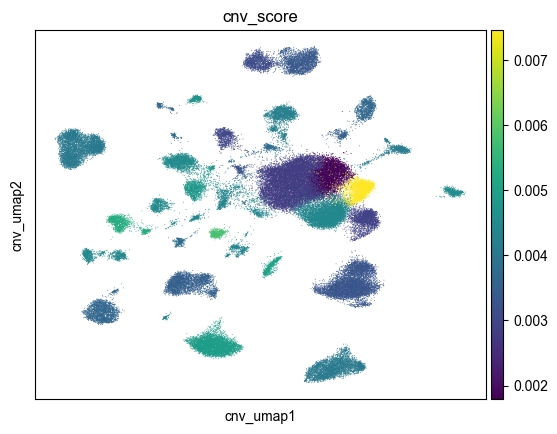

In [ ]:
cnv.tl.pca(adata_epi_cnv) 
cnv.pp.neighbors(adata_epi_cnv) 
cnv.tl.leiden(adata_epi_cnv)
cnv.tl.umap(adata_epi_cnv) 
cnv.tl.cnv_score(adata_epi_cnv)
cnv.pl.umap(adata_epi_cnv, color=['cnv_score'])

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


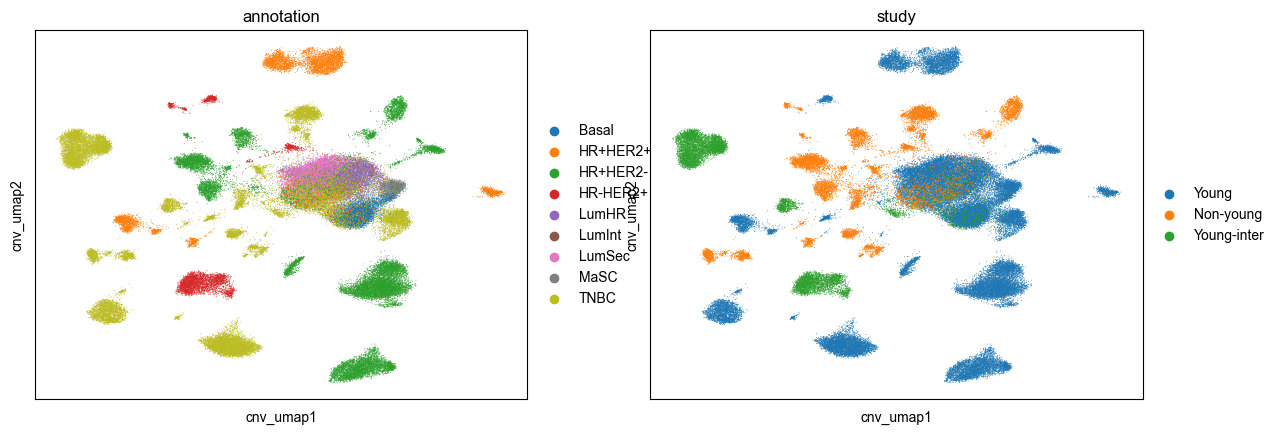

In [ ]:
cnv.pl.umap(adata_epi_cnv, color=['annotation', 'study'])

In [ ]:
adata_concat.obs['cnv_score'] = list(adata_epi_cnv.obs['cnv_score'])
adata_concat.obs['cnv_status'] = list(adata_epi_cnv.obs['cnv_status'])

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


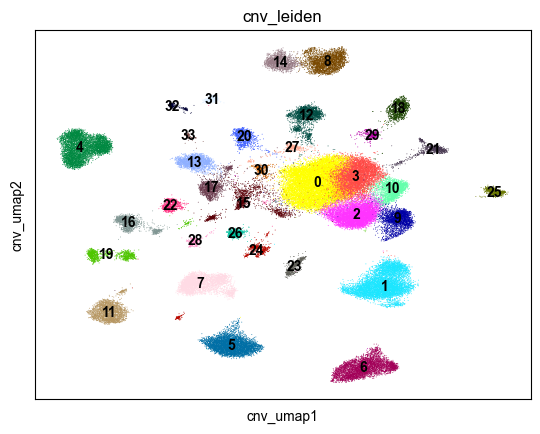

In [ ]:
cnv.pl.umap(adata_epi_cnv, color=['cnv_leiden'], legend_loc='on data')

... storing 'cnv_status' as categorical
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


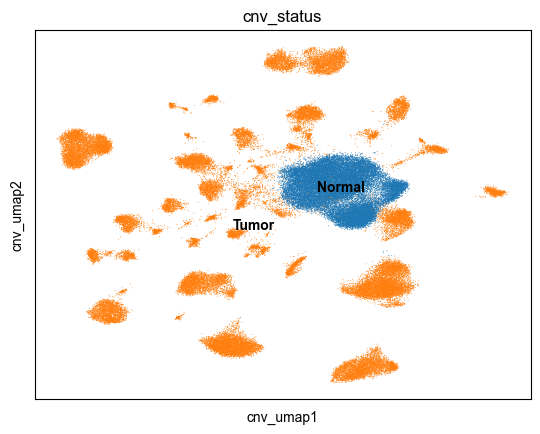

In [ ]:
def anno(adata:ad.AnnData, annoDict:dict, obsKey='cnv_status', obsVal='cnv_leiden', default="Unknown"):
  if default is not None:
    adata.obs[obsKey] = default
  for key in annoDict.keys():
    adata.obs.loc[adata.obs[obsVal].isin(annoDict[key]), obsKey] = key
  return adata
annot = {
  "Normal": ['0', '2','3','10'],
}
adata_epi_cnv = anno(adata_epi_cnv, annot, obsKey='cnv_status', obsVal='cnv_leiden', default="Tumor")
annot = {
  "Normal": ['Normal'],
}
adata_epi_cnv = anno(adata_epi_cnv, annot, obsKey='cnv_status', obsVal='annotation', default=None)
cnv.pl.umap(adata_epi_cnv, color=['cnv_status'], legend_loc='on data')

... storing 'cnv_status' as categorical


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


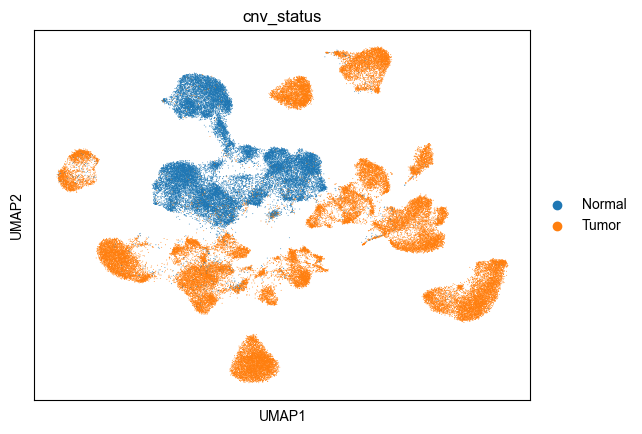

In [ ]:
sc.pl.umap(adata_concat, color=['cnv_status'])

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


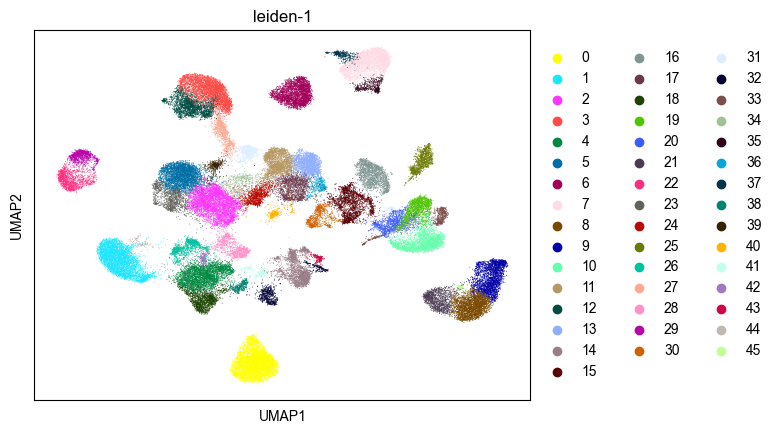

In [ ]:
sc.tl.leiden(adata_concat, resolution=2, key_added='leiden-1')
sc.pl.umap(adata_concat, color=['leiden-1'])

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


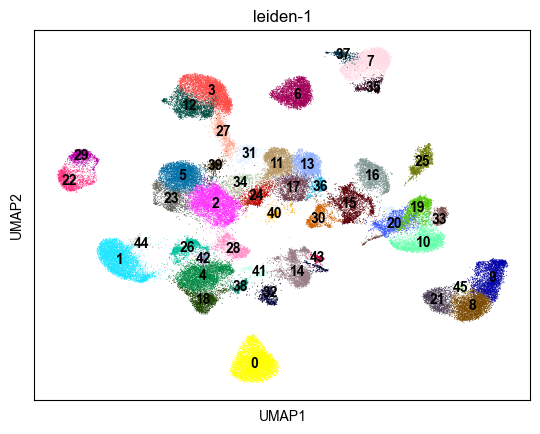

In [ ]:
sc.pl.umap(adata_concat, color=['leiden-1'], legend_loc='on data')

In [ ]:
adata_concat.obs['ori.annotation'] = adata_concat.obs['annotation']

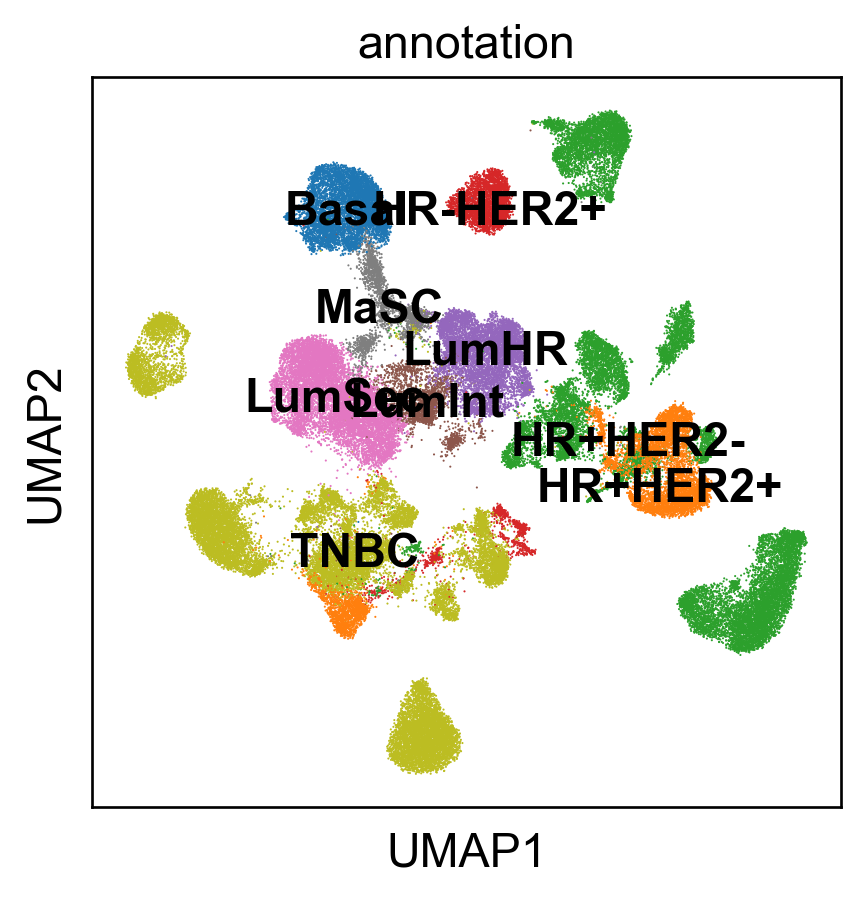

In [ ]:
annot = {
  "LumSec": ['2', '5','23'],
  "LumHR":['11', '13', '17', '36'],
  'LumInt':['34', '24', '40'],
  'MaSC':['27', '39'],
  'Basal':['3', '12']
}
adata_concat.obs['annotation'] = adata_concat.obs['ori.annotation']
adata_concat = anno(adata_concat, annot, obsKey='annotation', obsVal='leiden-1', default=None)
sc.pl.umap(adata_concat, color=['annotation'], legend_loc='on data')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


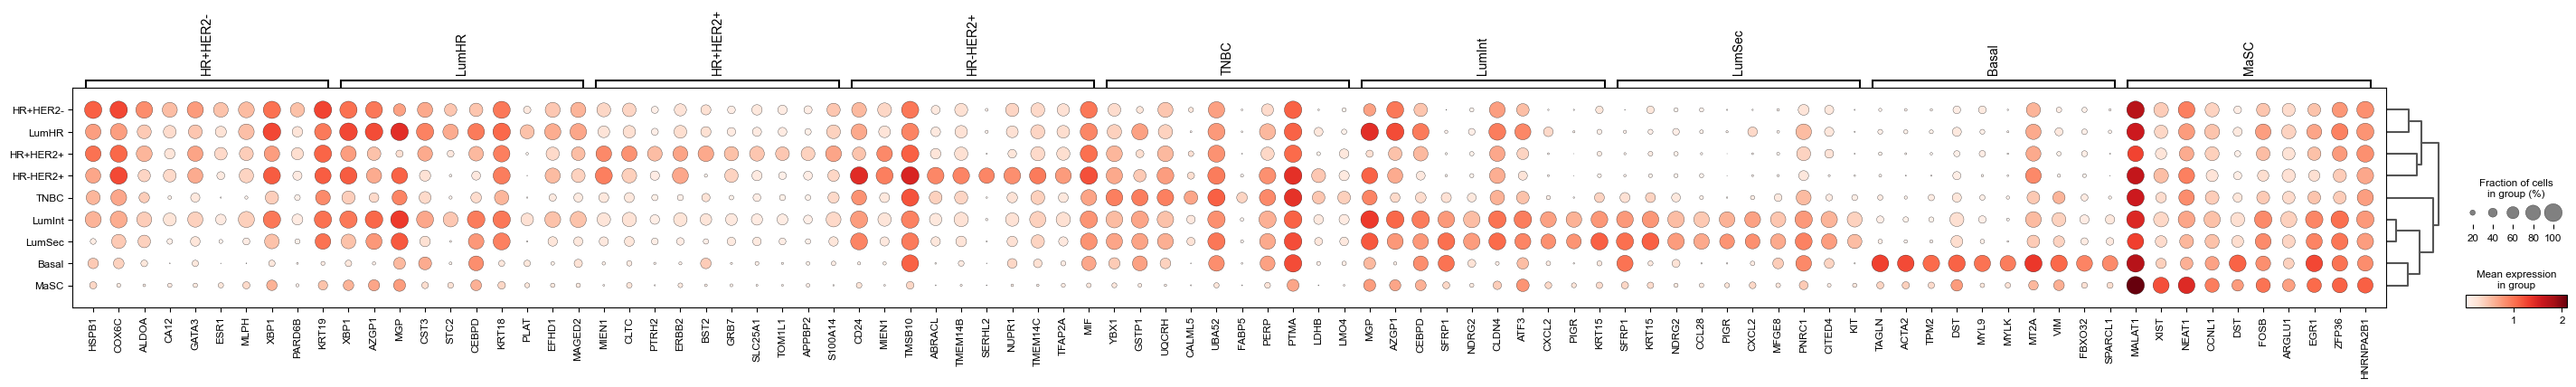

In [ ]:
sc.tl.rank_genes_groups(adata_concat, groupby='annotation')
sc.tl.dendrogram(adata_concat, groupby='annotation')
sc.pl.rank_genes_groups_dotplot(adata_concat, n_genes=10)

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


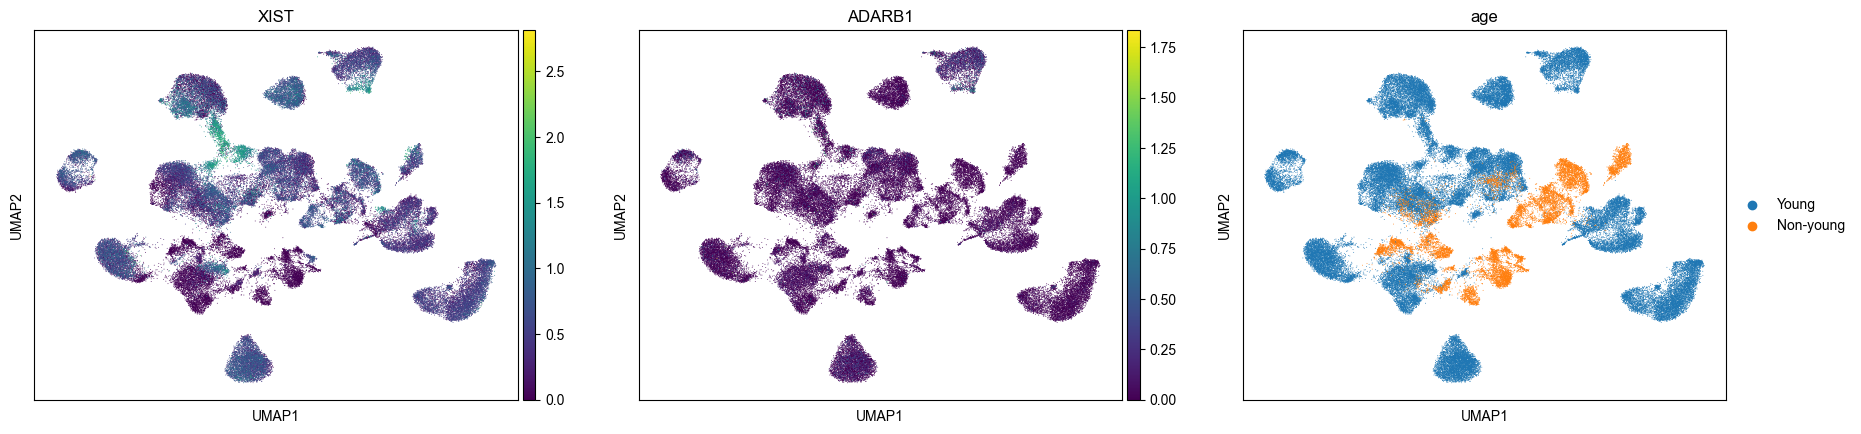

In [ ]:
sc.pl.umap(adata_concat, color=['XIST', 'ADARB1', 'age'])

In [ ]:
adata_concat.write_h5ad(f"{datapath}/adata-epi-concat.h5ad")